## Image Classification using CNNs ##

Caution: modify the path ```/content/drive/My Drive/classification-in-keras-using-cnn``` in the lines of code of this file, according to your path in Drive. Eg: if the location of your folder is in the main path of your Google Drive under the name ```cnn-colab```, then modify the last path to: ```/content/drive/My Drive/cnn-colab```

### Preparing Libraries ###

In [ ]:
# first Runtime > Factory Reset Runtime
# then click on Reconect, wait until reconection finish
# then run this block
# then Runtime > Restart Runtime, wait until reconection finish
# then run agin this block

!pip install tensorflow-gpu==1.15
!pip install keras==2.1.5

In [ ]:
import tensorflow
import keras
tensorflow.test.gpu_device_name()

# if the GPU works OK, it should print something like:
# /device:GPU:0

Using TensorFlow backend.


'/device:GPU:0'

In [ ]:
print(tensorflow.__version__)
print(keras.__version__)

# should print something like:
# 1.15.0
# 2.1.5

1.15.0
2.1.5


### Connecting to Drive ###

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
folder_location = "/content/drive/My Drive/classification-in-keras-using-cnn/"
dataset_location = "/tmp/dataset-cats-dogs/"

### Import the Dataset ###

In [ ]:
!wget --no-check-certificate \
    -r 'https://docs.google.com/uc?export=download&id=1ee0K4_19SK5PCxgqV0Qx05oof4bFRNAX' \
    -O /tmp/dataset-cats-dogs.zip

will be placed in the single file you specified.

--2020-08-29 21:16:37--  https://docs.google.com/uc?export=download&id=1ee0K4_19SK5PCxgqV0Qx05oof4bFRNAX
Resolving docs.google.com (docs.google.com)... 108.177.127.139, 108.177.127.102, 108.177.127.100, ...
Connecting to docs.google.com (docs.google.com)|108.177.127.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘/tmp/dataset-cats-dogs.zip’

/tmp/dataset-cats-d     [ <=>                ]   3.18K  --.-KB/s    in 0s      

2020-08-29 21:16:37 (46.7 MB/s) - ‘/tmp/dataset-cats-dogs.zip’ saved [3255]

Loading robots.txt; please ignore errors.
--2020-08-29 21:16:37--  https://docs.google.com/robots.txt
Reusing existing connection to docs.google.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘/tmp/dataset-cats-dogs.zip’

/tmp/dataset-cats-d     [ <=>                ]     567  --.-KB/s    in 0s      

2020-08-29 21:16:37 (83.1 

In [ ]:
import os
import zipfile

# decompressing zip
local_zip = '/tmp/dataset-cats-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

### Explore the data ###

In [ ]:
# directories
train_dir = dataset_location+'train'
test_dir = dataset_location+'test'

# directory with our training catand dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# directory with our test cat and dog pictures
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [ ]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])
train_dog_fnames = os.listdir(train_dogs_dir)
print(train_dog_fnames[:10])

['cat.341.jpg', 'cat.583.jpg', 'cat.791.jpg', 'cat.657.jpg', 'cat.698.jpg', 'cat.952.jpg', 'cat.988.jpg', 'cat.73.jpg', 'cat.621.jpg', 'cat.955.jpg']
['dog.477.jpg', 'dog.968.jpg', 'dog.286.jpg', 'dog.672.jpg', 'dog.598.jpg', 'dog.75.jpg', 'dog.578.jpg', 'dog.969.jpg', 'dog.489.jpg', 'dog.852.jpg']


In [ ]:
print('total number of training cat images:', len(os.listdir(train_cats_dir)))
print('total number of training dog images:', len(os.listdir(train_dogs_dir)))
print('total number of testing cat images:', len(os.listdir(test_cats_dir)))
print('total number of testing dog images:', len(os.listdir(test_dogs_dir)))

total number of training cat images: 1000
total number of training dog images: 1000
total number of testing cat images: 500
total number of testing dog images: 500


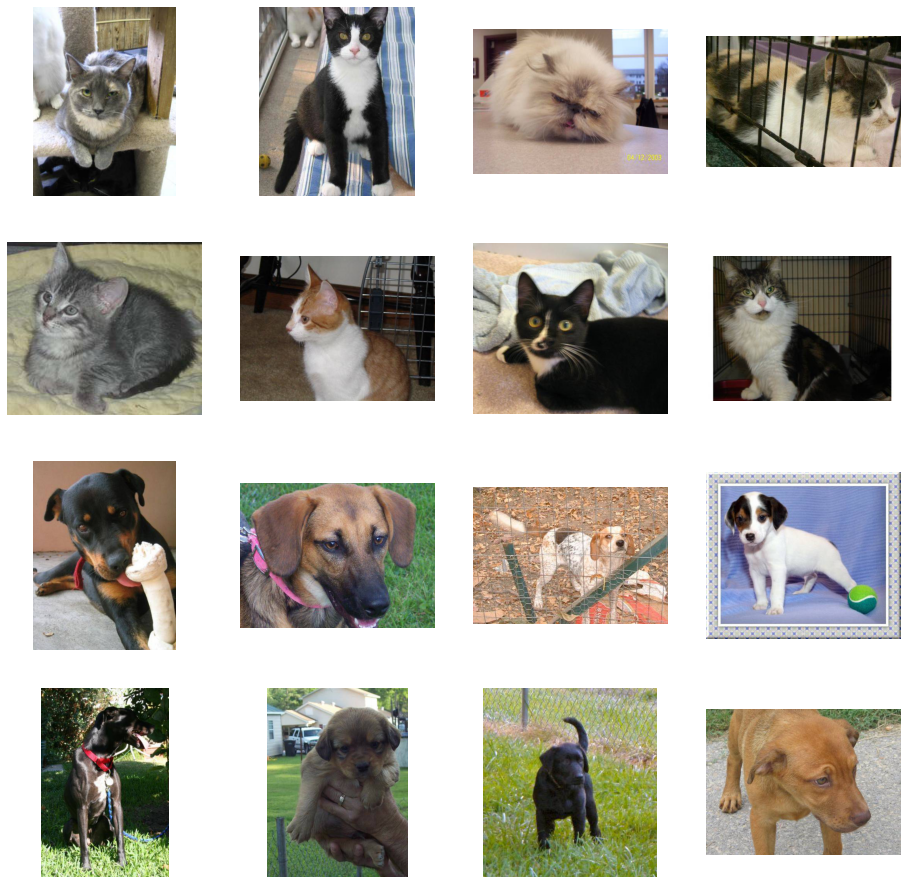

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# index for iterating over images
pic_index = 0

# set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

### Preprocess the data ###

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# all images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # this is the source directory for training images
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=20,  # batch size of 20 images
        class_mode='binary') # since we use binary_crossentropy loss, we need binary labels

# flow validation images in batches of 20 using val_datagen generator
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Build the model ###

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
# our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for the three color channels: R, G and B
img_input = layers.Input(shape=(150, 150, 3))

# the first layer of convolution applies 16@3x3 convolution operations
# the convolution is followed by a max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# the second layer of convolution applies 32@3x3 convolution operations
# the convolution is followed by a max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# the third layer of convolution applies 64@3x3 convolution operations
# the convolution is followed by a max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully connected layer + sigmoid output layer
model = Model(img_input, output)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0     

### Compile the model ###

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# compile the model
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr=0.001),
              metrics = ['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Train the model ###

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# checkpint settings
model_checkpoint = ModelCheckpoint(
    folder_location+'weights.hdf5', 
    monitor = 'loss', 
    verbose = 1, 
    save_best_only = True)

# start training
history = model.fit_generator(
      train_generator,
      steps_per_epoch = 100,  # 2000 images = batch_size * steps
      epochs = 15,
      validation_data = test_generator,
      validation_steps = 50,  # 1000 images = batch_size * steps
      verbose = 2,
      callbacks = [model_checkpoint])

Epoch 1/15
Epoch 1/15

Epoch 00001: loss improved from inf to 0.83622, saving model to /content/drive/My Drive/classification-in-keras-using-cnn/weights.hdf5
100/100 - 14s - loss: 0.8362 - acc: 0.5400 - val_loss: 0.6520 - val_acc: 0.6120
Epoch 2/15
Epoch 1/15

Epoch 00002: loss improved from 0.83622 to 0.62963, saving model to /content/drive/My Drive/classification-in-keras-using-cnn/weights.hdf5
100/100 - 8s - loss: 0.6296 - acc: 0.6565 - val_loss: 0.6632 - val_acc: 0.5950
Epoch 3/15
Epoch 1/15

Epoch 00003: loss improved from 0.62963 to 0.56482, saving model to /content/drive/My Drive/classification-in-keras-using-cnn/weights.hdf5
100/100 - 8s - loss: 0.5648 - acc: 0.7135 - val_loss: 0.5918 - val_acc: 0.6780
Epoch 4/15
Epoch 1/15

Epoch 00004: loss improved from 0.56482 to 0.48259, saving model to /content/drive/My Drive/classification-in-keras-using-cnn/weights.hdf5
100/100 - 8s - loss: 0.4826 - acc: 0.7685 - val_loss: 0.5871 - val_acc: 0.7010
Epoch 5/15
Epoch 1/15

Epoch 00005: los

### Examining the inner layers ###

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


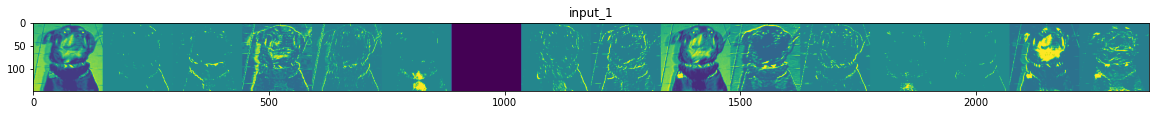

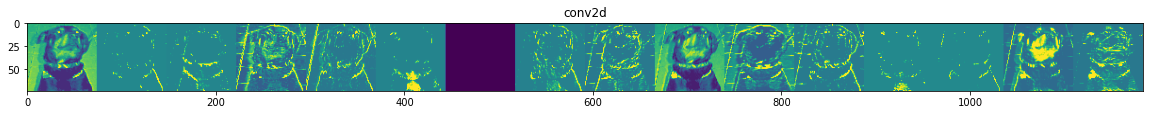

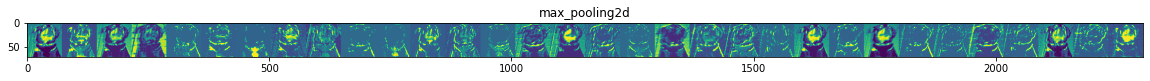

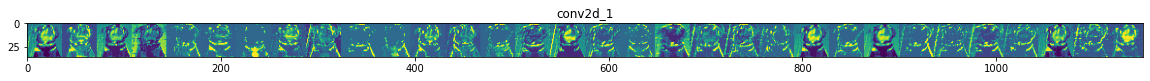

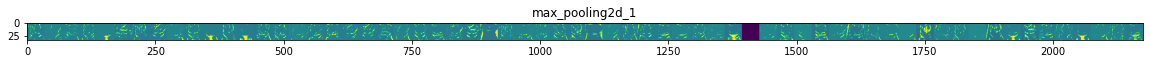

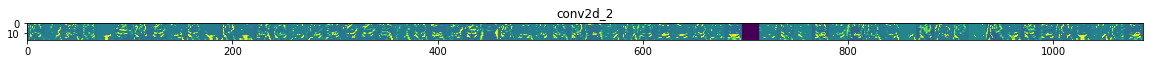

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after the first
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# let's prepare a random input image of a cat or dog from the training set
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # numpy array with shape (1, 150, 150, 3)

# rescale by 1/255
x /= 255

# let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# these are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # the feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # we will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # we'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
plt.show()

### Performance of training over time ###

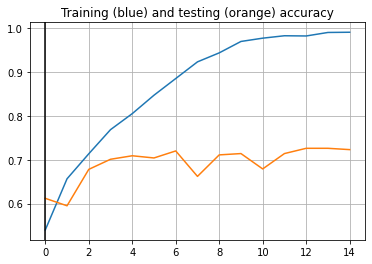

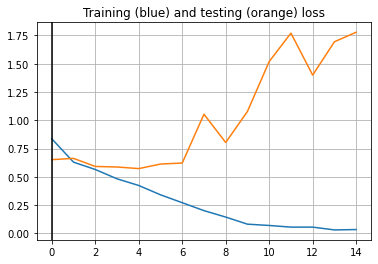

In [ ]:
# retrieve a list of accuracy results on training and testing data
# sets for each training epoch
acc = history.history['acc']
test_acc = history.history['val_acc']

# retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
test_loss = history.history['val_loss']

# get number of epochs
epochs = range(len(acc))

# plot training and testing accuracy per epoch
plt.figure()
plt.plot(epochs, acc, color='C0')  # blue
plt.plot(epochs, test_acc, color='C1')  # orange
plt.title('Training (blue) and testing (orange) accuracy')
plt.grid('on')
plt.axvline(x=0, color='k')

# plot training and testing loss per epoch
plt.figure()
plt.plot(epochs, loss, color='C0')  # blue
plt.plot(epochs, test_loss, color='C1')  # orange
plt.title('Training (blue) and testing (orange) loss')
plt.grid('on')
plt.axvline(x=0, color='k')

plt.show()

### Make predictions ###

Predicted: CAT


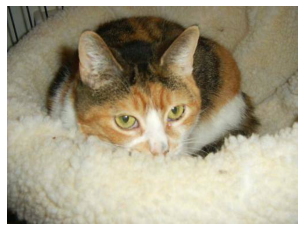

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import matplotlib.image as mpimg

image_pred = dataset_location+'test/cats/cat.2046.jpg'

# prepare the image
img = load_img(image_pred, target_size=(150, 150))  # load the image
img = img_to_array(img)  # convert to array
img = img.reshape(1, 150, 150, 3)  # reshape into a single sample with 3 channels
img = img.astype('float32')  # center pixel data

# load model
model.load_weights(folder_location+'weights.hdf5')

# predict the class
result = model.predict(img)

# print result
print("Predicted: ", end='')
print('CAT') if result[0][0] == 0 else print('DOG')

# show image
plt.imshow(mpimg.imread(image_pred))
plt.axis('Off')
plt.show()